In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Görüntü Sıkıştırma

Bu görevde **görüntüleri** 🖼️ veri olarak kullanacağız.

Görüntü sıkıştırma için **K-means** kullanarak, bir görüntüdeki renkleri yalnızca en sık kullanılanlara indirgeyeceksiniz.

## 1) Python ile görüntüler

Bu bölüm, Python'da görüntüleri nasıl işlediğimizi anlamanıza yardımcı olacaktır.  

**1. bölüm için kodlama gerekmez, dikkatlice okuyun ve verilen örnekleri uygulayın.**

### 1.1) Siyah beyaz görüntüler

Bir görüntü, her bir öğesinin bir piksel olduğu bir matris olarak tanımlanabilir.  

Renk skalası 0 (siyah) ile 255 (beyaz) arasındadır.  

Böylece, matristeki her bir öğenin değeri 0 ile 255 arasında olacaktır.

<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

Biz “matris” dedik, siz “numpy” düşündünüz, doğru 🙂  

👇 Aşağıdaki hücreyi çalıştırarak, yalnızca “numpy” ile oluşturulmuş siyah beyaz bir görüntüyü görebilirsiniz.

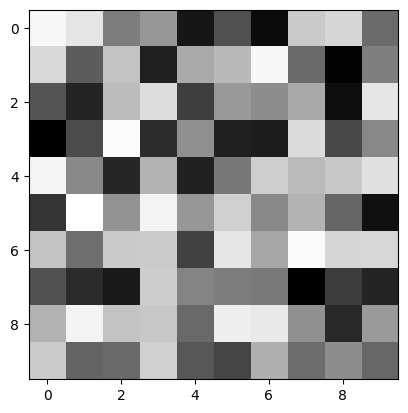

In [2]:
# 0 ile 255 arasında bir değere sahip 100 elemanlı bir vektör oluşturalım.
image_bw = np.random.uniform(low=0, high=255, size=100)

# Kare matris şeklinde yeniden şekillendirin, 10x10 piksel boyutunda bir görüntü elde ederiz.
image_bw = image_bw.reshape((10, 10))

# Son olarak oluşturulan görüntüyü göster
plt.imshow(image_bw, cmap='gray');

### 1.2) Renkli görüntüler :

Her renk, ana renklerin doğrusal bir kombinasyonudur: Kırmızı, Yeşil, Mavi  

Renkli bir görüntü, her bir ana renk için birer tane olmak üzere üç katmanın üst üste bindirilmesinden oluşur.  

Dolayısıyla her piksel için üç değerimiz vardır (Kırmızı, Yeşil, Mavi).

<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

👇  Yine, yalnızca `numpy` ile oluşturulmuş renkli bir görüntü görmek için aşağıdaki hücreleri çalıştırın.

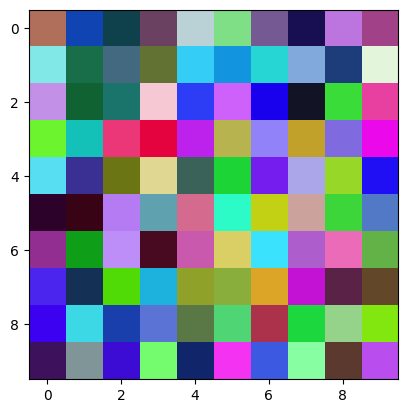

In [3]:
# 0 ile 1 arasında bir değere sahip 100*3 elemanlı bir vektör oluşturalım.
image_c = np.random.uniform(low=0., high=1., size=100*3)

# 3 renkli, 10x10 piksel boyutunda kare şeklinde bir görüntüye dönüştürün.
image_c = image_c.reshape((10, 10, 3))

# Son olarak oluşturulan görüntüyü göster
plt.imshow(image_c);

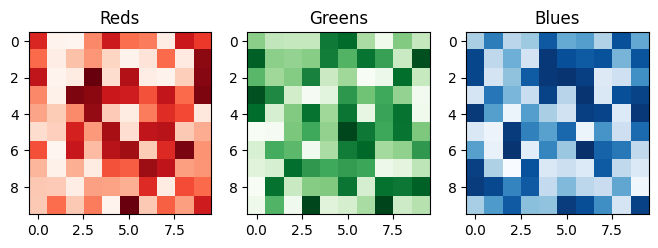

In [4]:
# Sezgisel bir fikir edinmek için, her renk katmanını çizelim.
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
colors = {0:'Reds', 1:'Greens', 2:'Blues'}

for i in colors:
    axs[i].imshow(image_c[:, :, i], cmap=colors[i])
    axs[i].set_title(colors[i])

## 2) ML için görüntüler

### 2.1) Kurulum

`skimage` kütüphanesini yükleyin, bu bize klasik görüntülere erişim sağlayacaktır.

In [5]:
! pip install --quiet scikit-image

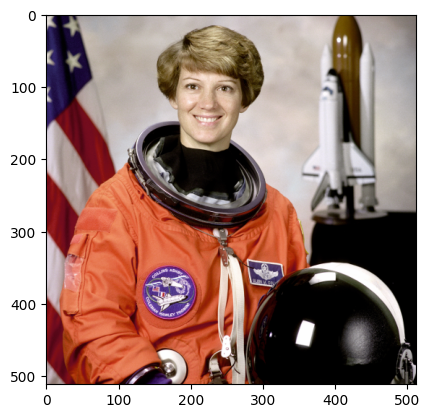

In [6]:
from skimage import data
img = data.astronaut()
plt.imshow(img);

❓ What is the shape of this image?  
Assign it to `img_shape`

In [7]:
img_shape = img.shape
print(f"Görüntü Boyutu: {img_shape}")

Görüntü Boyutu: (512, 512, 3)


### 2.2) Renk sayısı

Görüntümüzü sıkıştırmaya veya genel olarak makine öğrenimine hazır hale getirmek için, onu **gözlemler** ve **özellikler** olarak temsil etmemiz gerekir.  

Her **piksel** bir **gözlemdir**  
Her **renk değeri (Kırmızı, Yeşil, Mavi)** bir **özelliktir**  

Görüntümüzde **262.144 gözlem** (512 * 512 piksel) ve **3 özellik** (RGB) bulunmaktadır.

❓ Görüntüyü yeniden şekillendirin:  
- Mevcut 3 boyutlu şekli olan `width x height x 3`
- `n_piksel x 3` şeklindeki 2 boyutlu matrise, burada  `n_pixels = width * height`  

Yeniden şekillendirilen görüntüyü `X`'e atayın.

In [8]:
# -1 argümanı, NumPy'ın satır sayısını (512*512) otomatik hesaplamasını sağlar.
# Sütun sayısını 3 (RGB) olarak sabitliyoruz.
X = img.reshape(-1, 3)

# Sonucu kontrol edelim
print(f"Orijinal Görüntü Şekli: {img.shape}")
print(f"Yeni Veri Matrisi (X):  {X.shape}")

Orijinal Görüntü Şekli: (512, 512, 3)
Yeni Veri Matrisi (X):  (262144, 3)


Renkli bir görüntü, 16 milyona kadar potansiyel renk içerebilir.  

Aslında, her piksel için **3** kanalımız vardır ve her kanal için **256** olası değerimiz vardır (0'dan 255'e kadar).  
Bu nedenle, renkli bir görüntüde potansiyel olarak maksimum **16.777.216** *($256^3$)* renk vardır.  

Görüntümüz sadece 262.144 piksel (512 * 512) olduğundan, her piksel üç kanalın değerleri tarafından tanımlanan tek bir renk içerdiğinden, en fazla 262.144 renk kullanır.

Hadi sayalım! 🕵️

❓ Bu resimdeki benzersiz renklerin sayısını `color_count` içinde saklayın.

In [9]:
import numpy as np

# axis=0 diyerek "benzersiz satırları" (yani benzersiz RGB kombinasyonlarını) sayıyoruz
unique_colors = np.unique(X, axis=0)

color_count = len(unique_colors)

print(f"Bu resimdeki benzersiz renk sayısı: {color_count}")

Bu resimdeki benzersiz renk sayısı: 113382


Elimizdekileri inceleyelim:
- 262.144 gözlem, her gözlem bir pikseldir
- Her gözlem için 3 özellik (Kırmızı, Yeşil ve Mavi değerleri)
- Bilinmeyen sayıda küme 😱

**Renk sayısını azaltmak için neler yapabileceğimize bakalım** 🎨

### 🧪 Kodunu Test Et

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('image_analysis',
                         img_shape = img_shape,
                         color_count = color_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/egkpnr/.pyenv/versions/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /home/egkpnr/code/EGkpnr/S17D3-S-/S17D3-S-data-image-compressor/tests
plugins: anyio-4.8.0, dash-3.3.0, typeguard-4.4.2, langsmith-0.6.0
collecting ... collected 2 items

test_image_analysis.py::TestImageAnalysis::test_color_count PASSED       [ 50%]
test_image_analysis.py::TestImageAnalysis::test_img_shape PASSED         [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/image_analysis.pickle

git commit -m 'Completed image_analysis step'

git push origin master



## 3) K-means ile sıkıştırma

**113.382** rengi **K** renge indirmek istiyoruz.  

Pikseller üzerinde `KMeans` algoritması kullanarak, her pikseli **K** kümeden birine atayabiliriz!  

Her kümenin merkezi, o kümeye ait piksellerin ortalama rengi olacaktır. 

Daha sonra bu “ortalama küme rengini” kümedeki her piksel için RGB değeri olarak kullanabiliriz.  

💪🧠 Haydi başlayalım, hedefimiz sadece **32** renk kullanmak!

❓ ML hazır görüntünüz `X` üzerinde `n_clusters=32` ile bir K-means uyarlayın ve bunu `kmeans`'e atayın.

In [12]:
from sklearn.cluster import KMeans

# 1. Modeli 32 küme (renk) olacak şekilde başlatıyoruz
# random_state=42, sonuçların tekrarlanabilir olması için önemlidir.
kmeans = KMeans(n_clusters=32, random_state=42)

# 2. Modeli piksellere (X) uyduruyoruz
kmeans.fit(X)

KMeans(n_clusters=32, random_state=42)

👉 `kmeans`'inizin `labels_`'ini kontrol edin, ardından `shape` ve `number of unique values`'ını kontrol edin.

In [13]:
# 1. Etiketlerin şeklini (Shape) kontrol edelim
print(f"Labels Shape: {kmeans.labels_.shape}")

# 2. Kaç farklı küme oluştuğunu (Unique Values) sayalım
unique_count = len(np.unique(kmeans.labels_))
print(f"Benzersiz Etiket Sayısı: {unique_count}")

Labels Shape: (262144,)
Benzersiz Etiket Sayısı: 32


☝️ Şöyle açıklayalım:

- Her etiket bir kümedir
- Her gözleme bir etiket atanmıştır
- Toplamda 32 farklı etiket vardır, her küme için bir tane

❓ `KMeans`'inizin `cluster_centers_` öğesini, şeklini ve ilk öğesini kontrol edin.

In [15]:
# 1. Küme merkezlerinin boyutunu (Shape) kontrol et
print(f"Cluster Centers Shape: {kmeans.cluster_centers_.shape}")

# 2. İlk küme merkezini (İlk Rengi) yazdır
print(f"First Cluster Center (RGB): {kmeans.cluster_centers_[0]}")

Cluster Centers Shape: (32, 3)
First Cluster Center (RGB): [236.53936348 230.98555276 234.33752094]


☝️Her cluster_center, RGB değerlerinin bir vektörüdür ve kümenin ortalama rengini temsil eder.

❓ Her piksel resmi için karşılık gelen kümenin ortalama rengini depolayan `X_compressed` dizisini oluşturun.

<details span="markdown">
    <summary>💡 Yardım</summary>

Bunu yalnızca `kmeans.cluster_centers_` ve `kmeans.labels_` kullanarak gerçekleştirebilirsiniz.

---

</details>

In [16]:
# Her pikselin etiketini (indeksini) alıp, o indeksin merkez rengini çağırıyoruz
X_compressed = kmeans.cluster_centers_[kmeans.labels_]

# Şekli kontrol edelim
print(f"X_compressed Shape: {X_compressed.shape}")

X_compressed Shape: (262144, 3)


RGB değerleri tamsayı olmalıdır.  

`X_compressed` içindeki renklerimiz `float64` türündedir.  

❓ `X_compressed` türünü, 0 ile 255 arasında değişen, işaretsiz 8 bitlik tamsayı türü olan `uint8` türüne dönüştürün.

In [17]:
X_compressed = X_compressed.astype('uint8')

# Kontrol etmek isterseniz:
print(X_compressed.dtype)

uint8


❓ Kullanılan benzersiz renk sayısının gerçekten 32 olduğunu doğrulayın.

In [18]:
# Benzersiz renkleri (satırları) bul
unique_colors_final = np.unique(X_compressed, axis=0)

# Sayısını yazdır
print(f"Sıkıştırılmış Görüntüdeki Renk Sayısı: {len(unique_colors_final)}")

Sıkıştırılmış Görüntüdeki Renk Sayısı: 32


Neredeyse bitti! 💪

## 4) Sıkıştırılmış görüntüyü çiz

`X_compressed` şeklimiz (262144, 3) olduğundan, bunu bir görüntü olarak görüntüleyemeyiz.

❓ Sıkıştırılmış görüntünüzü yeniden şekillendirin ve orijinal görüntünüzle yan yana çizim yapın.  

<details>
    <summary>💡 İpucu</summary>

Düzleştirilmiş `X_compressed` öğenizi bir görüntü için doğru boyutlara yeniden şekillendirmeniz gerekir.  
Orijinal görüntünüz bu boyutlara sahiptir.

---

</details>

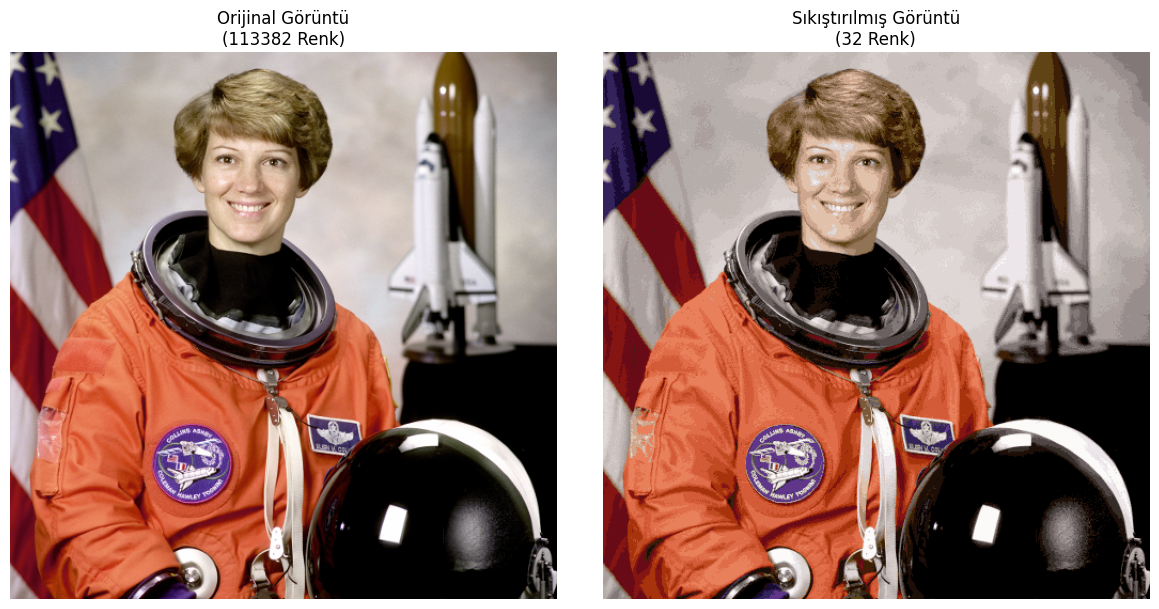

In [19]:
# 1. Sıkıştırılmış veriyi görüntü formatına geri döndür (Reshape)
# img.shape, (512, 512, 3) değerini verir.
img_compressed = X_compressed.reshape(img.shape)

# 2. Yan yana görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Orijinal Görüntü
ax[0].imshow(img)
ax[0].set_title(f"Orijinal Görüntü\n({color_count} Renk)")
ax[0].axis('off') # Eksenleri kapatalım daha temiz görünsün

# Sıkıştırılmış Görüntü
ax[1].imshow(img_compressed)
ax[1].set_title(f"Sıkıştırılmış Görüntü\n(32 Renk)")
ax[1].axis('off')

plt.tight_layout()
plt.show()

Aferin! 💪

Bazı renkler kaybolmuş, ancak orijinal görüntüyü kolayca tanıyabilirsiniz.

🏁 **Not defterinizi itmeyi unutmayın.**  

Günün görevlerini yerine getirin ve zamanınız olursa buraya geri dönün 😉

## 5 - İsteğe bağlı) elbow yöntemini kullanın

En az renk bilgisini kaybeden optimum sıkıştırmayı bulmak için elbow yöntemini kullanmayı deneyebilirsiniz.   

Örneğin, [5, 10, 20, 30, 50, 70, 100] listesindeki `n_clusters` için `inertia` değerini çizmeye çalışın.  

⚠️ Uzun süren eğitim, birkaç dakika beklemeniz gerekebilir.

🚀 Elbow analizi başlıyor... Kahve molası verebilirsiniz ☕
Eğitiliyor: k=5...
Eğitiliyor: k=10...
Eğitiliyor: k=20...
Eğitiliyor: k=30...
Eğitiliyor: k=50...
Eğitiliyor: k=70...
Eğitiliyor: k=100...
✅ İşlem tamamlandı!


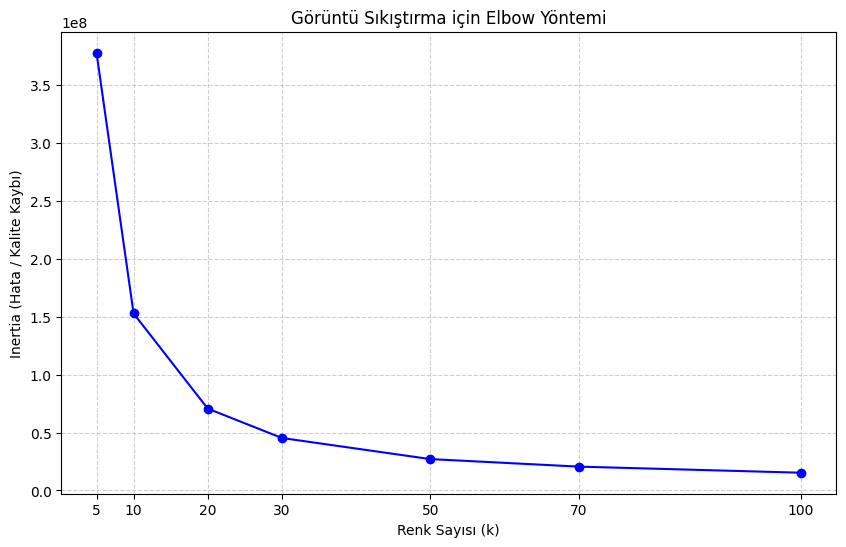

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Denenecek küme (renk) sayıları
k_values = [5, 10, 20, 30, 50, 70, 100]
inertias = []

print("🚀 Elbow analizi başlıyor... Kahve molası verebilirsiniz ☕")

for k in k_values:
    # İlerlemeyi görmek için yazdıralım
    print(f"Eğitiliyor: k={k}...")
    
    # Modeli oluştur ve eğit
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    
    # Inertia değerini kaydet
    inertias.append(model.inertia_)

print("✅ İşlem tamamlandı!")

# --- Grafiği Çiz ---
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='b')

plt.title('Görüntü Sıkıştırma için Elbow Yöntemi')
plt.xlabel('Renk Sayısı (k)')
plt.ylabel('Inertia (Hata / Kalite Kaybı)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(k_values)

plt.show()

❓ Aşağıdaki hücreyi çalıştırarak, farklı sayıda küme kullanarak sıkıştırılmış görüntünüzü görselleştirin  
⚠️ Bu uzun bir eğitimdir, birkaç dakika beklemeniz gerekecektir

working with 1 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 1 clusters...
The Kmeans inertia is equal to 4891993276.003909


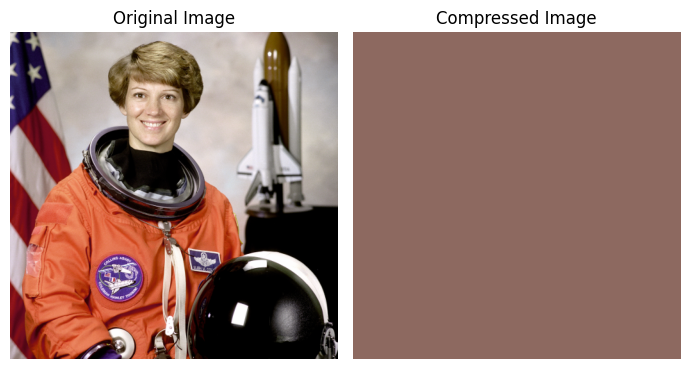

working with 2 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 2 clusters...
The Kmeans inertia is equal to 1509787857.886413


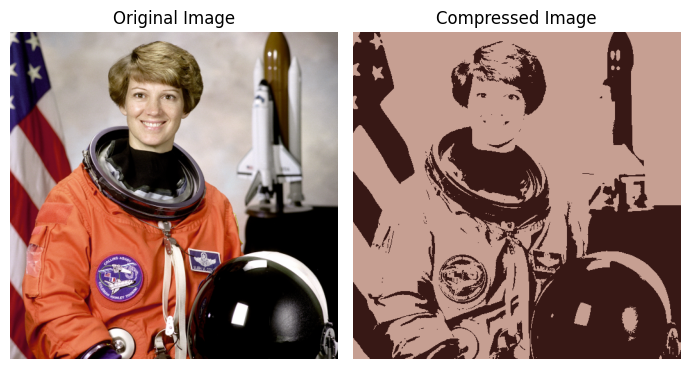

working with 5 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 5 clusters...
The Kmeans inertia is equal to 386296092.0687262


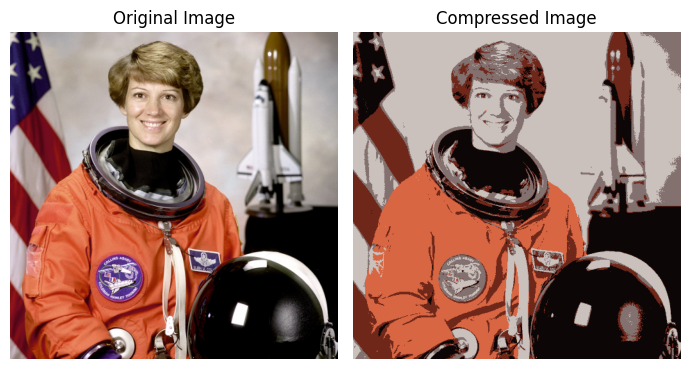

working with 10 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 10 clusters...
The Kmeans inertia is equal to 161581200.5181772


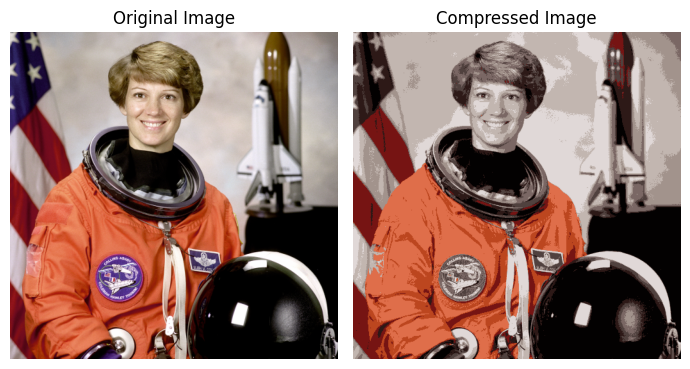

working with 20 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 20 clusters...
The Kmeans inertia is equal to 71309881.57676761


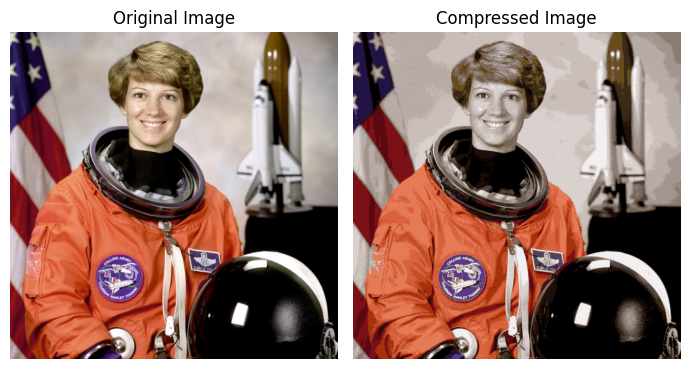

working with 30 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 30 clusters...
The Kmeans inertia is equal to 48472221.730755344


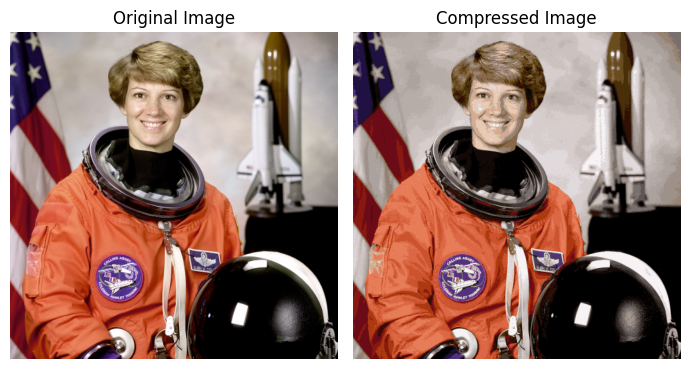

working with 50 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 50 clusters...
The Kmeans inertia is equal to 27207234.33848764


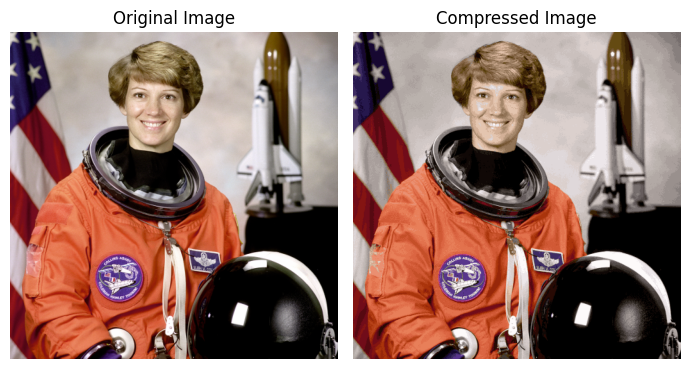

working with 70 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 70 clusters...
The Kmeans inertia is equal to 21028732.72540782


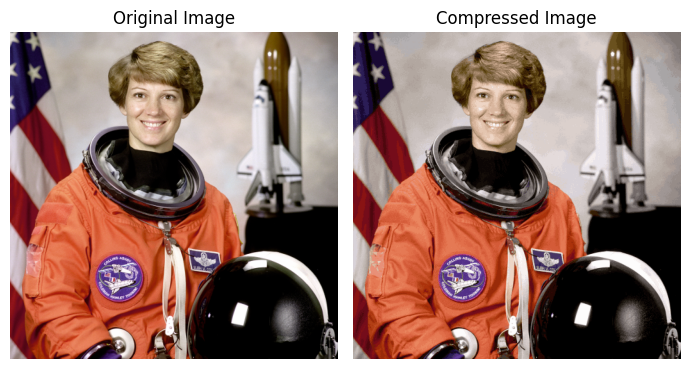

working with 100 clusters...
------------------------------------------------------------------------------------------------------------------------
If we compress our 113382 unique colors into 100 clusters...
The Kmeans inertia is equal to 15455203.903893076


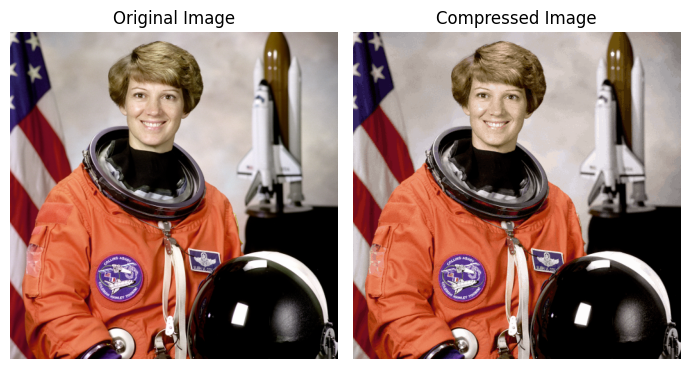

In [21]:
wcss = []
compressed_astronaut = []
for i in [1, 2, 5, 10, 20, 30, 50, 70, 100]:
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(X)
    # inertia hesapla
    wcss.append(kmeans.inertia_)
    # sıkıştırılmış astronot hesapla
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    X_compressed = centers[labels]
    X_compressed = X_compressed.astype('uint8')
    img_compressed = X_compressed.reshape(img_shape[0], img_shape[1], img_shape[2])
    compressed_astronaut.append(img_compressed)
    # print edin
    print("-"*120)
    print(f"If we compress our 113382 unique colors into {i} clusters...")
    print(f"The Kmeans inertia is equal to {kmeans.inertia_}")
    fig, ax = plt.subplots(1, 2, figsize = (7, 7))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[1].imshow(img_compressed)
    ax[1].set_title('Compressed Image')
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()